<a href="https://colab.research.google.com/github/JiHoonMin/deeplearning/blob/main/Image%20Classifier_MLP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Imports

In [ ]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import os

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Lab 1: Image Classifier with Keras Sequential API

In [ ]:
fashion_mnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full),(X_test,y_test) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


In [ ]:
#scale input into range 0-1 by /255
X_valid, X_train = X_train_full[:5000] / 255.,X_train_full[5000:] /255.
y_valid, y_train = y_train_full[:5000] ,y_train_full[5000:] 
X_test = X_test / 255.

In [ ]:
class_names = ["T-shirt/top", "Trouser","Pullover","Dress","Coat","Sandal","Shirt","Sneaker","Bag","Ankle boot"]

In [ ]:
def show_mnist_fashion():
    n_rows = 4
    n_cols = 10
    plt.figure(figsize=(n_cols * 1.2, n_rows * 1.2))
    for row in range(n_rows):
        for col in range(n_cols):
            index = n_cols * row + col
            plt.subplot(n_rows, n_cols, index + 1)
            plt.imshow(X_train[index], cmap="binary", interpolation="nearest")
            plt.axis('off')
            plt.title(class_names[y_train[index]], fontsize=12)
    plt.subplots_adjust(wspace=0.2, hspace=0.5)
    plt.show()

In [ ]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28,28]))
model.add(keras.layers.Dense(300,activation="relu"))
model.add(keras.layers.Dense(100,activation="relu"))
model.add(keras.layers.Dense(10,activation="softmax"))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 300)               235500    
_________________________________________________________________
dense_1 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [ ]:
hidden1 = model.layers[1]
hidden1.name

'dense'

In [ ]:
weights, biases = hidden1.get_weights()

In [ ]:
weights.shape

(784, 300)

In [ ]:
biases.shape

(300,)

In [ ]:
model.compile(loss="sparse_categorical_crossentropy",optimizer="sgd",metrics=["accuracy"])

In [ ]:
history = model.fit(X_train,y_train,epochs=30,validation_data=(X_valid,y_valid))

Epoch 1/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.7336 - accuracy: 0.7568 - val_loss: 0.5190 - val_accuracy: 0.8234
Epoch 2/30
1719/1719 [==============================] - 4s 3ms/step - loss: 0.4908 - accuracy: 0.8290 - val_loss: 0.4534 - val_accuracy: 0.8464
Epoch 3/30
1719/1719 [==============================] - 4s 3ms/step - loss: 0.4476 - accuracy: 0.8427 - val_loss: 0.4298 - val_accuracy: 0.8534
Epoch 4/30
1719/1719 [==============================] - 4s 3ms/step - loss: 0.4192 - accuracy: 0.8529 - val_loss: 0.4039 - val_accuracy: 0.8654
Epoch 5/30
1719/1719 [==============================] - 4s 3ms/step - loss: 0.3996 - accuracy: 0.8593 - val_loss: 0.3800 - val_accuracy: 0.8714
Epoch 6/30
1719/1719 [==============================] - 4s 3ms/step - loss: 0.3839 - accuracy: 0.8638 - val_loss: 0.3718 - val_accuracy: 0.8726
Epoch 7/30
1719/1719 [==============================] - 4s 3ms/step - loss: 0.3700 - accuracy: 0.8694 - val_loss: 0.3746 - val_accuracy:

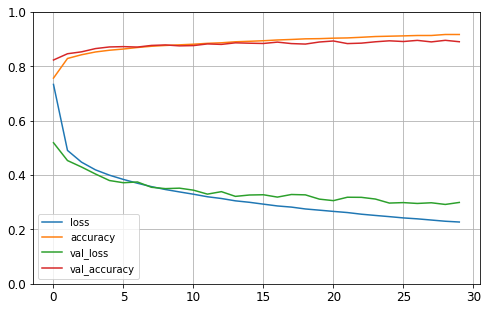

In [ ]:
import pandas as pd
pd.DataFrame(history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

In [ ]:
model.evaluate(X_test,y_test) #default batch_size = 32

313/313 [==============================] - 0s 1ms/step - loss: 0.3301 - accuracy: 0.8823


[0.3300684690475464, 0.8823000192642212]

In [ ]:
X_new = X_test[:3]
y_proba = model.predict(X_new)
y_proba.round(2)

array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.99],
       [0.  , 0.  , 0.99, 0.  , 0.  , 0.  , 0.01, 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ]],
      dtype=float32)

In [ ]:
y_pred = model.predict_classes(X_new)
y_pred

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


array([9, 2, 1])

In [ ]:
np.array(class_names)[y_pred]

array(['Ankle boot', 'Pullover', 'Trouser'], dtype='<U11')

In [ ]:
y_new = y_test[:3]
y_new

array([9, 2, 1], dtype=uint8)

# Lab 2 : Regression MLP with Keras Sequential API

## Data preparation

In [ ]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

housing = fetch_california_housing()
print('feature_names:', housing['feature_names'])

X_train_full, X_test, y_train_full, y_test = train_test_split(housing.data, housing.target, random_state=42)
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_valid = scaler.transform(X_valid)
X_test = scaler.transform(X_test)

feature_names: ['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude']


In [ ]:
model = keras.models.Sequential([keras.layers.Dense(30,activation="relu",input_shape=X_train.shape[1:]),
                                 keras.layers.Dense(1)
])
model.compile(loss="mean_squared_error", optimizer=keras.optimizers.SGD(lr=1e-3))
history = model.fit(X_train, y_train, epochs =20,validation_data=(X_valid, y_valid))

NameError: ignored

In [ ]:
import pandas as pd
plt.plot(pd.DataFrame(history.history))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

In [ ]:
mse_test = model.evaluate(X_test,y_test)
print("mse_test",mse_test)

In [ ]:
X_new = X_test[:3]
y_pred = model.predict(X_new)
y_pred

# Lab 3 : KERAS FUNCTIONAL API For Complex Model

In [ ]:
input_ = keras.layers.Input(shape=X_train.shape[1:])
hidden1 = keras.layers.Dense(30,activation="relu")(input_)
hidden2 = keras.layers.Dense(30,activation="relu")(hidden1)
concat = keras.layers.concatenate([input_,hidden2])
output = keras.layers.Dense(1)(concat)
model = keras.models.Model(inputs=[input_], outputs=[output])

In [ ]:
model.summary()

Model: "functional_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 8)]          0                                            
__________________________________________________________________________________________________
dense_5 (Dense)                 (None, 30)           270         input_1[0][0]                    
__________________________________________________________________________________________________
dense_6 (Dense)                 (None, 30)           930         dense_5[0][0]                    
__________________________________________________________________________________________________
concatenate (Concatenate)       (None, 38)           0           input_1[0][0]                    
                                                                 dense_6[0][0]         

In [ ]:
model.compile(loss="mean_squared_error",optimizer=keras.optimizers.SGD(lr=1e-3))
history = model.fit(X_train, y_train, epochs = 20,
                    validation_data=(X_valid,y_valid))

Epoch 1/20
363/363 [==============================] - 1s 1ms/step - loss: 1.8082 - val_loss: 0.7527
Epoch 2/20
363/363 [==============================] - 0s 1ms/step - loss: 0.7055 - val_loss: 0.6943
Epoch 3/20
363/363 [==============================] - 0s 1ms/step - loss: 0.6562 - val_loss: 0.6339
Epoch 4/20
363/363 [==============================] - 0s 1ms/step - loss: 0.6221 - val_loss: 0.5969
Epoch 5/20
363/363 [==============================] - 0s 1ms/step - loss: 0.5936 - val_loss: 0.6110
Epoch 6/20
363/363 [==============================] - 0s 1ms/step - loss: 0.5699 - val_loss: 0.5457
Epoch 7/20
363/363 [==============================] - 0s 1ms/step - loss: 0.5493 - val_loss: 0.5994
Epoch 8/20
363/363 [==============================] - 0s 1ms/step - loss: 0.5315 - val_loss: 0.5246
Epoch 9/20
363/363 [==============================] - 0s 1ms/step - loss: 0.5159 - val_loss: 0.4849
Epoch 10/20
363/363 [==============================] - 0s 1ms/step - loss: 0.5024 - val_loss: 0.4754

In [ ]:
mse_test = model.evaluate(X_test,y_test)
print("mse_test",mse_test)

162/162 [==============================] - 0s 787us/step - loss: 0.4274
mse_test 0.42735055088996887


In [ ]:
X_new = X_test[:3]
y_pred = model.predict(X_new)
print(y_pred)

[[0.5910424]
 [1.528566 ]
 [3.2364616]]


# Exercise

In [ ]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28,28]))
model.add(keras.layers.Dense(300,activation="relu"))
model.add(keras.layers.Dense(200,activation="relu"))
model.add(keras.layers.Dense(100,activation="relu"))
model.add(keras.layers.Dense(10,activation="softmax"))

In [ ]:
X_valid, X_train = X_train_full[:5000] / 255.,X_train_full[5000:] /255.
y_valid, y_train = y_train_full[:5000] ,y_train_full[5000:] 
X_test = X_test / 255.

In [ ]:
model.compile(loss="sparse_categorical_crossentropy",optimizer="sgd",metrics=["accuracy"])

In [ ]:
history = model.fit(X_train,y_train,epochs=30,validation_data=(X_valid,y_valid))

Epoch 1/30
1719/1719 [==============================] - 6s 3ms/step - loss: 0.7175 - accuracy: 0.7596 - val_loss: 0.4930 - val_accuracy: 0.8314
Epoch 2/30
1719/1719 [==============================] - 6s 3ms/step - loss: 0.4754 - accuracy: 0.8330 - val_loss: 0.4363 - val_accuracy: 0.8482
Epoch 3/30
1719/1719 [==============================] - 6s 3ms/step - loss: 0.4268 - accuracy: 0.8490 - val_loss: 0.3993 - val_accuracy: 0.8620
Epoch 4/30
1719/1719 [==============================] - 6s 3ms/step - loss: 0.3970 - accuracy: 0.8590 - val_loss: 0.4060 - val_accuracy: 0.8584
Epoch 5/30
1719/1719 [==============================] - 6s 3ms/step - loss: 0.3757 - accuracy: 0.8673 - val_loss: 0.3596 - val_accuracy: 0.8742
Epoch 6/30
1719/1719 [==============================] - 6s 3ms/step - loss: 0.3571 - accuracy: 0.8726 - val_loss: 0.3917 - val_accuracy: 0.8598
Epoch 7/30
1719/1719 [==============================] - 6s 3ms/step - loss: 0.3435 - accuracy: 0.8760 - val_loss: 0.3481 - val_accuracy:

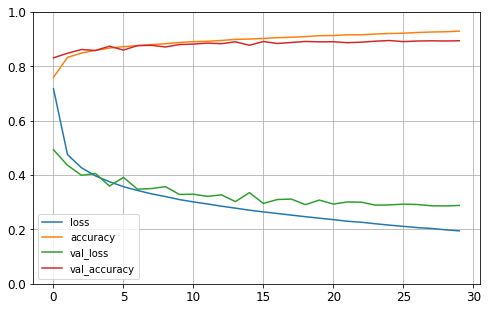

In [ ]:
import pandas as pd
pd.DataFrame(history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

In [ ]:
model.evaluate(X_test,y_test) #default batch_size = 32

313/313 [==============================] - 0s 2ms/step - loss: 0.3285 - accuracy: 0.8858


[0.3285304605960846, 0.8858000040054321]